# CLASS PROJECT
## EXPLORATORY DATA ANALYSIS AND VISUALIZATION (COM SCI X 450.2)
# GERARDO TAPIA
# PROJECT: SPOTIFY MUSIC TRACKS ANALYSIS

### 1.- Set-up
The dataset I will be using in this class project is "SpotifyFeatures.csv" I found it in Kaggle. After reading a lot of similar datasets, this one had similar information to the idea I want to implement in the future. Here is the link where you can find it 

This dataset contains information about music tracks and characteristics that can describe features of the music, for example
 Basic track metadata (title, artist name, genre, track id)
Popularity
Music features (acousticness, danceability, energy, instrumentalness, liveness, loudness, speech, valence)
The explanation of every measure:  https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

Why am I interested in this dataset?
I work in a company that produces video-on-demand content, articles, and car reviews. We are interested in understanding more about our end users, such as:
- The type of content they consume
- Identify trends  (continuous, seasonal)
- Identify the relationship between the different types of content 
- Identify any behavior using our sites or platforms
All this information will help us improve how we display our content, identify the correct funnel to acquire more subscribers, make more and better recommendations and be more assertive with each of our user targets. That will increase our user database, engagement, and loyalty to our Brand.
In this dataset, even when it is music related, the metadata used is similar to the one we have available for our content. This will help me to practice and improve my new skills and add value to the business in the short term.

### 2.- Thorough exploration of the nin-value qualities of the data

In [2]:
#Let's start importing the libraries we will be using in this project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Now, we need to import the SpotifyFeatures.csv dataset
df_spotify = pd.read_csv('SpotifyFeatures.csv')
df_spotify.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


I want to define some of theese variables that we found that are somehow important for the analysis we will be doing
- Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- Speechiness: Speechiness detects the presence of spoken words in a track.
- Loudness: The overall loudness of a track in decibels (dB).
- Liveness: Detects the presence of an audience in the recording.
- key: Pitch class notation (See reference in the table)
- Energy: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity
- Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity

In [4]:
# What is the shape of our dataset
# 232,725 rows = different tracks
# 18 columns
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [4]:
# Name of the dataset columns
df_spotify.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [5]:
# datatype of the columns
df_spotify.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

I want tocheck that there if we have null values in the dataset

In [6]:
pd.isnull(df_spotify).sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

No null values at all!!! Great!

In [7]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

We can see that we have 2 columns of Categorical data genre and mode

- 7 object/string columns
- 9 float columns
- 2 int columns

In [8]:
# what are the genre's unique values 
df_spotify['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

#### I found an inconsistency in this value, the genre Children's Music value is duplicated because the use of different ' ’ character, we will fix this later in this project

In [9]:
# The dataset documentation mentioned that the column mode should only contain 2 possible values Major/Minor lets validate it
df_spotify['mode'].unique()

array(['Major', 'Minor'], dtype=object)

So, the documentation is correct, only two values on mode column

At this point these are our findings
- The size of our dataset is 232,725 rows with 18 columns
- We do not have missing or null values
- We identify one minor inconsistency related to the genre column, that we'll fix 
- two categorical data columns identified
   - genre
   - mode
- Seven columns that according to the values definition the range of possible values should be between 0-1
- popularity column should have only values between the range of 0-100

### 3.- Thorough exploration of the data values

Statistics about the data

In [10]:
df_spotify.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,232725.0,41.127502,18.189948,0.00000,29.0000,43.000000,55.0000,100.000
acousticness,232725.0,0.368560,0.354768,0.00000,0.0376,0.232000,0.7220,0.996
danceability,232725.0,0.554364,0.185608,0.05690,0.4350,0.571000,0.6920,0.989
duration_ms,232725.0,235122.339306,118935.909299,15387.00000,182857.0000,220427.000000,265768.0000,5552917.000
energy,232725.0,0.570958,0.263456,0.00002,0.3850,0.605000,0.7870,0.999
instrumentalness,232725.0,0.148301,0.302768,0.00000,0.0000,0.000044,0.0358,0.999
liveness,232725.0,0.215009,0.198273,0.00967,0.0974,0.128000,0.2640,1.000
loudness,232725.0,-9.569885,5.998204,-52.45700,-11.7710,-7.762000,-5.5010,3.744
speechiness,232725.0,0.120765,0.185518,0.02220,0.0367,0.050100,0.1050,0.967
tempo,232725.0,117.666585,30.898907,30.37900,92.9590,115.778000,139.0540,242.903


Based on the documentation provided by Spotify, we have some values that are inside the range of 0-1
- acousticness
- danceability
- energy
- instrumentalness
- liveness
- speechiness
- valence
in the previous describe information displayed, we can see the min/max values and seems to be correct with the definition


In [11]:
# getting the min values per each of those columns
df_spotify[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness','speechiness','valence']].min()

acousticness        0.00000
danceability        0.05690
energy              0.00002
instrumentalness    0.00000
liveness            0.00967
speechiness         0.02220
valence             0.00000
dtype: float64

In [12]:
# getting the max value of those columns
df_spotify[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness','speechiness','valence']].max()

acousticness        0.996
danceability        0.989
energy              0.999
instrumentalness    0.999
liveness            1.000
speechiness         0.967
valence             1.000
dtype: float64

According to Spotify documentation and responses in his QA section, the values for the column "popularity" could be any possible value between 0-100, being 100 the most popular. So, I want ot verify that this is consistent with the values in our dataset. Here the link where I found that definition https://community.spotify.com/t5/Content-Questions/Artist-popularity/td-p/4415259

In [13]:
df_spotify.sort_values(by="popularity",ascending=False, inplace=True)

In [14]:
df_spotify.popularity.head(5)

9027      100
107804    100
86951      99
107803     99
107802     99
Name: popularity, dtype: int64

In [15]:
df_spotify.popularity.tail(5)

195435    0
195434    0
195433    0
195432    0
0         0
Name: popularity, dtype: int64

After checking these values, we have values between 0-100 that is consistent with the definition provided by Spotify

We identified a typo issue with the genres "Children's Music" and "Children’s Music", these 2 values seems to be the same so we need to standarize it and keep only one value

In [16]:
df_spotify.replace("Children’s Music", 
           "Children's Music", 
           inplace=True) 

In [17]:
# Now we can see only one value related to Childre's Music
df_spotify['genre'].unique()

array(['Dance', 'Pop', 'Rap', 'Hip-Hop', 'Reggaeton', 'Indie',
       'Electronic', 'Rock', 'R&B', "Children's Music", 'Soul', 'Folk',
       'Alternative', 'Movie', 'Country', 'Blues', 'Jazz', 'Reggae',
       'World', 'Ska', 'Soundtrack', 'Classical', 'Anime', 'Opera',
       'Comedy', 'A Capella'], dtype=object)

According to the documentation, the column time_signature is "a notational convention to specify how many beats are in each bar." I found this definition about measures of these musical beats "Most Western sheet music gets divided into measures, and the most common of these is a measure containing four beats" https://www.masterclass.com/articles/guide-to-time-signatures-in-music

So, let's review if the data is consistent with that definition of four beats

In [18]:
df_spotify.time_signature.unique()

array(['4/4', '3/4', '5/4', '1/4', '0/4'], dtype=object)

The different values of the time_signature are measured in four beats as indicated in the definition mentioned before, so we can say that these values are correct.

Another field I want to validate is the called "key" that according to the Spotify definition is "The key the track is in" and there is a standard table to use for this data available here https://en.wikipedia.org/wiki/Pitch_class
So, I want to verify that this information is accurate to the Pitch class table

In [19]:
df_spotify.key.unique()

array(['C#', 'B', 'F', 'G#', 'D', 'F#', 'G', 'E', 'C', 'A#', 'D#', 'A'],
      dtype=object)

After validating the unique values available in our dataset vs the Pitch Class table, I can conclude that all our values are valid values for this type of information.

Next, I want to identify categorical values for categorical data

In [20]:
# How is distributed the tracks per genre
df_spotify.groupby("genre").apply(len).sort_values(ascending=False)

genre
Children's Music    14756
Comedy               9681
Soundtrack           9646
Indie                9543
Jazz                 9441
Pop                  9386
Electronic           9377
Folk                 9299
Hip-Hop              9295
Rock                 9272
Alternative          9263
Classical            9256
Rap                  9232
World                9096
Soul                 9089
Blues                9023
R&B                  8992
Anime                8936
Reggaeton            8927
Ska                  8874
Reggae               8771
Dance                8701
Country              8664
Opera                8280
Movie                7806
A Capella             119
dtype: int64

In [21]:
# How are distributed the tracks per key
df_spotify.groupby("key").apply(len)

key
A     22671
A#    15526
B     17661
C     27583
C#    23201
D     24077
D#     7566
E     17390
F     20279
F#    15222
G     26390
G#    15159
dtype: int64

In [22]:
# How are distributed the tracks per mode
df_spotify.groupby("mode").apply(len)

mode
Major    151744
Minor     80981
dtype: int64

In [23]:
# How are distributed the tracks per artist
by_artist= df_spotify.groupby(["artist_name"]).apply(len).sort_values(ascending=False)
by_artist.head(10)

artist_name
Giuseppe Verdi             1394
Giacomo Puccini            1137
Kimbo Children's Music      971
Nobuo Uematsu               825
Richard Wagner              804
Wolfgang Amadeus Mozart     800
Randy Newman                757
Georges Bizet               701
Juice Music                 684
Johann Sebastian Bach       632
dtype: int64

In [24]:
by_time_signature= df_spotify.groupby(["time_signature"]).apply(len).sort_values(ascending=False)
by_time_signature.head()

time_signature
4/4    200760
3/4     24111
5/4      5238
1/4      2608
0/4         8
dtype: int64

At this point, data seems to be consistent, accurate and logical. Now, I want to identify any possible relationship between variables, so I will create a correlation table for this purpose.

In [25]:
df_spotify.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.381295,0.256564,0.002348,0.248922,-0.210983,-0.167995,0.363011,-0.151076,0.081039,0.060076
acousticness,-0.381295,1.000000,-0.364546,0.011203,-0.725576,0.316154,0.069004,-0.690202,0.150935,-0.238247,-0.325798
danceability,0.256564,-0.364546,1.000000,-0.125781,0.325807,-0.364941,-0.041684,0.438668,0.134560,0.021939,0.547154
duration_ms,0.002348,0.011203,-0.125781,1.000000,-0.030550,0.076021,0.023783,-0.047618,-0.016171,-0.028456,-0.141811
energy,0.248922,-0.725576,0.325807,-0.030550,1.000000,-0.378957,0.192801,0.816088,0.145120,0.228774,0.436771
instrumentalness,-0.210983,0.316154,-0.364941,0.076021,-0.378957,1.000000,-0.134198,-0.506320,-0.177147,-0.104133,-0.307522
liveness,-0.167995,0.069004,-0.041684,0.023783,0.192801,-0.134198,1.000000,0.045686,0.510147,-0.051355,0.011804
loudness,0.363011,-0.690202,0.438668,-0.047618,0.816088,-0.506320,0.045686,1.000000,-0.002273,0.228364,0.399901
speechiness,-0.151076,0.150935,0.134560,-0.016171,0.145120,-0.177147,0.510147,-0.002273,1.000000,-0.081541,0.023842
tempo,0.081039,-0.238247,0.021939,-0.028456,0.228774,-0.104133,-0.051355,0.228364,-0.081541,1.000000,0.134857


Here is a heatmap to have a visual representation of the correlation between the variables

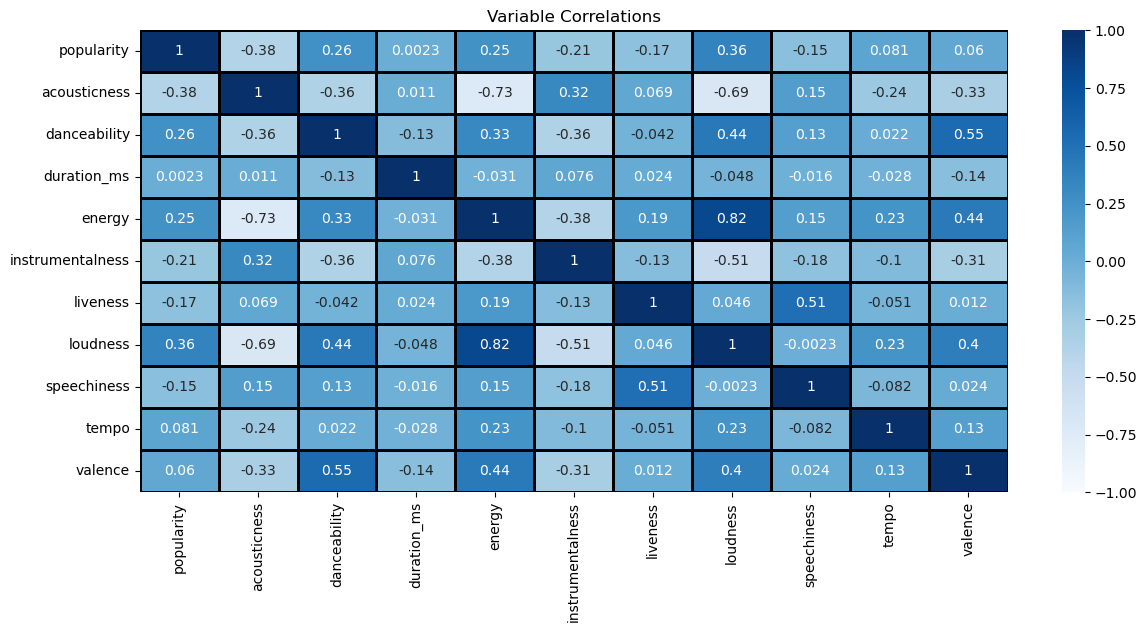

In [26]:
plt.figure(figsize=(14,6))
g=sns.heatmap(data=df_spotify.corr(),
             cmap="Blues", annot=True, vmin=-1, vmax=1,cbar=True,
             linewidths=1, linecolor='Black')
g.set_title("Variable Correlations")
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

What are my findings so far?
- The data is consistent with the definition provided by Spotify
- I was not able to identify any missing data
- I found some interesting correlations in this order of correlation
   - loudness / energy
   - energy / acousticness
   - loudness / acousticness
   - valence / danceability
- In general, the correlation between variables is low contrary to my initial thoughts, some of my original assumptions where
   - Popularity could be related with the genre FALSE
   - valence could be related with popularity FALSE 


In [27]:
# I want to double-check that there are not values of the popularity column that are outside the defined range 0-100
df_spotify[(0 < df_spotify['popularity']) & (df_spotify['popularity'] > 100)].apply(len)

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

Based on this analysis, I think there are some columns that could be represented in a different form.

I will add a new column to transform genre from categorical to numerical, because maybe is it possible to find any other correlation between the genre and the features of the music.


In [28]:
# I will add a new column to add this numerical column
df_spotify.insert(18,'genre_dict',0)
# Then I will search for each genre an update the new column with a specific value
for index, row in df_spotify.iterrows():    
    if (row['genre']=="Children's Music"):
        df_spotify.loc[index,'genre_dict'] = 1
    elif (row['genre']=="Comedy"):
        df_spotify.loc[index,'genre_dict'] = 2
    elif (row['genre']=="Soundtrack"):
        df_spotify.loc[index,'genre_dict'] = 3
    elif (row['genre']=="Indie"):
        df_spotify.loc[index,'genre_dict'] = 4
    elif (row['genre']=="Jazz"):
        df_spotify.loc[index,'genre_dict'] = 5
    elif (row['genre']=="Pop"):
        df_spotify.loc[index,'genre_dict'] = 6
    elif (row['genre']=="Electronic"):
        df_spotify.loc[index,'genre_dict'] = 7
    elif (row['genre']=="Folk"):
        df_spotify.loc[index,'genre_dict'] = 8
    elif (row['genre']=="Hip-Hop"):
        df_spotify.loc[index,'genre_dict'] = 9
    elif (row['genre']=="Rock"):
        df_spotify.loc[index,'genre_dict'] = 10
    elif (row['genre']=="Alternative"):
        df_spotify.loc[index,'genre_dict'] = 11
    elif (row['genre']=="Classical"):
        df_spotify.loc[index,'genre_dict'] = 12
    elif (row['genre']=="Rap"):
        df_spotify.loc[index,'genre_dict'] = 13
    elif (row['genre']=="World"):
        df_spotify.loc[index,'genre_dict'] = 14
    elif (row['genre']=="Soul"):
        df_spotify.loc[index,'genre_dict'] = 15
    elif (row['genre']=="Blues"):
        df_spotify.loc[index,'genre_dict'] = 16
    elif (row['genre']=="R&B"):
        df_spotify.loc[index,'genre_dict'] = 17
    elif (row['genre']=="Anime"):
        df_spotify.loc[index,'genre_dict'] = 18
    elif (row['genre']=="Reggaeton"):
        df_spotify.loc[index,'genre_dict'] = 19
    elif (row['genre']=="Ska"):
        df_spotify.loc[index,'genre_dict'] = 20
    elif (row['genre']=="Reggae"):
        df_spotify.loc[index,'genre_dict'] = 21
    elif (row['genre']=="Dance"):
        df_spotify.loc[index,'genre_dict'] = 22
    elif (row['genre']=="Country"):
        df_spotify.loc[index,'genre_dict'] = 23
    elif (row['genre']=="Opera"):
        df_spotify.loc[index,'genre_dict'] = 24
    elif (row['genre']=="Movie"):
        df_spotify.loc[index,'genre_dict'] = 25
    elif (row['genre']=="A Capella"):
        df_spotify.loc[index,'genre_dict'] = 26

I am running corr again with the new column included and lets see if the genre is correlated with any possible music feature variable

In [29]:
df_spotify.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre_dict
popularity,1.000000,-0.381295,0.256564,0.002348,0.248922,-0.210983,-0.167995,0.363011,-0.151076,0.081039,0.060076,-0.194505
acousticness,-0.381295,1.000000,-0.364546,0.011203,-0.725576,0.316154,0.069004,-0.690202,0.150935,-0.238247,-0.325798,-0.055214
danceability,0.256564,-0.364546,1.000000,-0.125781,0.325807,-0.364941,-0.041684,0.438668,0.134560,0.021939,0.547154,0.000250
duration_ms,0.002348,0.011203,-0.125781,1.000000,-0.030550,0.076021,0.023783,-0.047618,-0.016171,-0.028456,-0.141811,0.017132
energy,0.248922,-0.725576,0.325807,-0.030550,1.000000,-0.378957,0.192801,0.816088,0.145120,0.228774,0.436771,0.005696
instrumentalness,-0.210983,0.316154,-0.364941,0.076021,-0.378957,1.000000,-0.134198,-0.506320,-0.177147,-0.104133,-0.307522,-0.150581
liveness,-0.167995,0.069004,-0.041684,0.023783,0.192801,-0.134198,1.000000,0.045686,0.510147,-0.051355,0.011804,-0.097208
loudness,0.363011,-0.690202,0.438668,-0.047618,0.816088,-0.506320,0.045686,1.000000,-0.002273,0.228364,0.399901,0.045772
speechiness,-0.151076,0.150935,0.134560,-0.016171,0.145120,-0.177147,0.510147,-0.002273,1.000000,-0.081541,0.023842,-0.240978
tempo,0.081039,-0.238247,0.021939,-0.028456,0.228774,-0.104133,-0.051355,0.228364,-0.081541,1.000000,0.134857,0.044334


Reviewing the new coeficients, genre is not correlated with any additional variable. 

Another field that could represented in a different form is the column popularity. I am going to represent it in a new column by quantiles

In [30]:
df_spotify['pop_quantiles'] = pd.qcut(df_spotify['popularity'],4)

In [31]:
# I am sorting by a different column to visualize different quantiles values in the new column
df_spotify.sort_values(by="genre",ascending=False, inplace=True)

In [32]:
df_spotify.pop_quantiles.unique()

[(29.0, 43.0], (-0.001, 29.0], (43.0, 55.0], (55.0, 100.0]]
Categories (4, interval[float64, right]): [(-0.001, 29.0] < (29.0, 43.0] < (43.0, 55.0] < (55.0, 100.0]]

In [33]:
df_spotify.head(10)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genre_dict,pop_quantiles
210656,World,Yaima,Morpho,2zvA3R0PICX8NOZ5cJVu9N,33,0.635,0.650,284453,0.377,0.186000,C,0.0882,-12.641,Major,0.0298,134.996,4/4,0.2180,14,"(29.0, 43.0]"
220722,World,Rend Collective,Christ Has Set Me Free,0VfjwFJ0p9L3ywvP0BQckb,28,0.109,0.335,141053,0.439,0.000006,F,0.1210,-13.378,Major,0.0291,178.147,4/4,0.4830,14,"(-0.001, 29.0]"
217880,World,Colleen,Captain Of None,2qwaRVGyn7zdIFPbhKXmEm,40,0.977,0.855,357282,0.381,0.812000,C,0.0938,-12.339,Major,0.0489,104.714,4/4,0.3480,14,"(29.0, 43.0]"
209073,World,Grouper,Headache,4EDj8GXOlI45vG4SOfswK3,53,0.833,0.276,304461,0.155,0.876000,A,0.0809,-22.065,Major,0.0445,138.946,4/4,0.0382,14,"(43.0, 55.0]"
221186,World,Jon Hopkins,Breathe This Air - Asleep Version,4MggcQUVMf7EAA8k7foOQT,28,0.570,0.165,193960,0.299,0.238000,C#,0.1500,-18.369,Major,0.0420,100.281,3/4,0.0862,14,"(-0.001, 29.0]"
216786,World,Matt Maher,As Good as It Gets,682KYPyyxXzVwm9vUugnLK,34,0.289,0.408,228653,0.406,0.000036,F,0.0980,-8.752,Major,0.0333,144.129,3/4,0.2030,14,"(29.0, 43.0]"
219115,World,Fountain Of Praise,Mimo (feat. Sola Allyson),5aLpw7VX35DeXZID3Drv4B,28,0.659,0.398,1102093,0.611,0.000000,A,0.1020,-4.416,Major,0.0373,139.998,4/4,0.4190,14,"(-0.001, 29.0]"
219110,World,A Winged Victory for the Sullen,Atomos IX,4DP61nSfrWp0WdwIUrASlu,28,0.806,0.153,256000,0.177,0.888000,A,0.1000,-18.700,Minor,0.0420,65.814,4/4,0.0303,14,"(-0.001, 29.0]"
220751,World,Biosphere,Just One Kiss,54t2dTQ7ckm1BxvFsaibHZ,34,0.902,0.620,301360,0.217,0.919000,F#,0.0642,-17.698,Major,0.0646,120.997,4/4,0.5120,14,"(29.0, 43.0]"
221190,World,Aphex Twin,Ruglen Holon,3ILqdMyLiDMcpgCkZAs10v,28,0.898,0.775,109280,0.189,0.892000,C,0.0796,-22.208,Major,0.0997,119.882,5/4,0.4350,14,"(-0.001, 29.0]"


## 4. Data Visualization

Lets display some histogram plots of the most relevant columns based on the previous analysis
- energy
- acousticness
- loudness
- valence
- danceability

The first plot is the energy histogram

<AxesSubplot:xlabel='Count', ylabel='energy'>

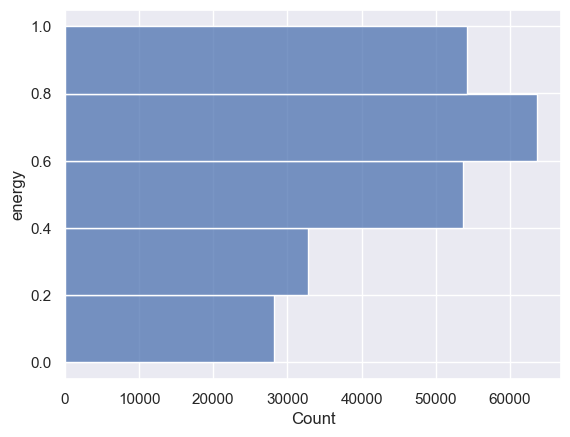

In [34]:
sns.set(style='darkgrid')
sns.histplot(data=df_spotify, y='energy', bins=5, stat='count')

With the new added column pop_qantiles, I want to see how are these histograms of energy per quantile. Some findings here
- The tracks in the lower populartiy bucket has a low energy
- Tracks  in the quantiles buckets 2,3,4 all of them has a energy between .6 to .8 

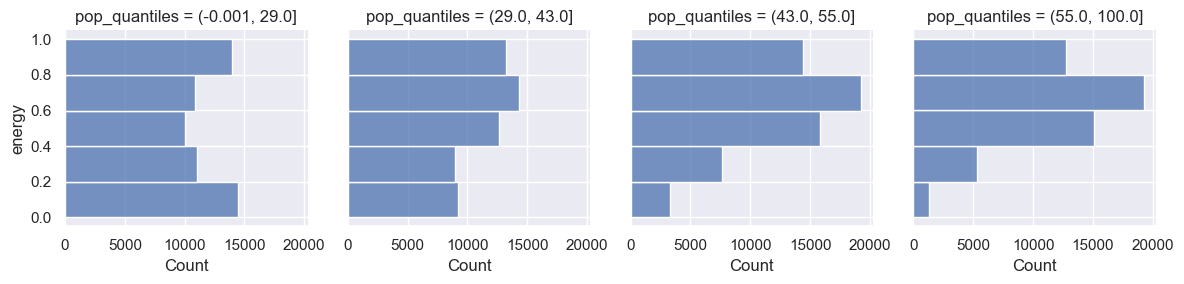

In [35]:
g = sns.FacetGrid(df_spotify, col='pop_quantiles')
g.map_dataframe(sns.histplot, y='energy', bins=5)

The second plot is the acousticness histogram

<AxesSubplot:xlabel='Count', ylabel='acousticness'>

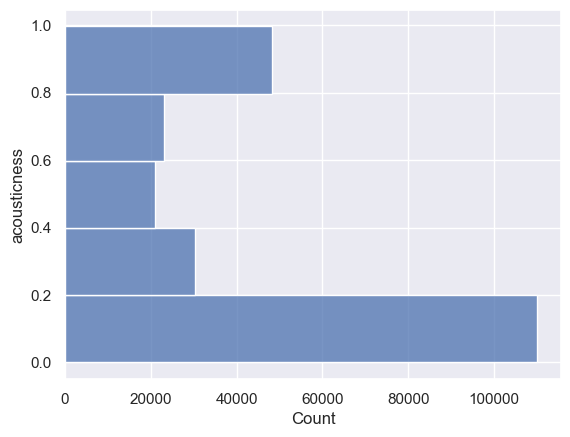

In [36]:
sns.set(style='darkgrid')
sns.histplot(data=df_spotify, y='acousticness', bins=5, stat='count')

As we can see in the genreal histogram, more than 50% of the tracks has an acousticness value between 0 to .2 ,meaning that are not acoustic tracks

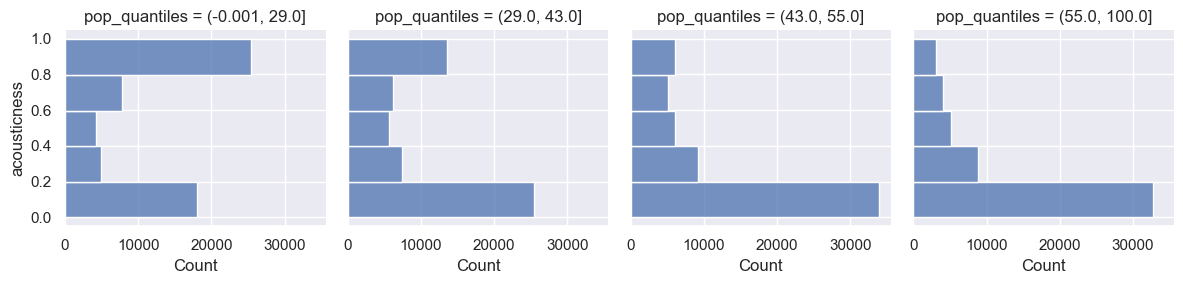

In [37]:
g = sns.FacetGrid(df_spotify, col='pop_quantiles')
g.map_dataframe(sns.histplot, y='acousticness', bins=5)

Something interesting is that the content with the lower popularity are those tracks that are acoustic, while the tracos in the last quartile are not acoustic tracks

The third histogram is the loudness histogram

<AxesSubplot:xlabel='Count', ylabel='loudness'>

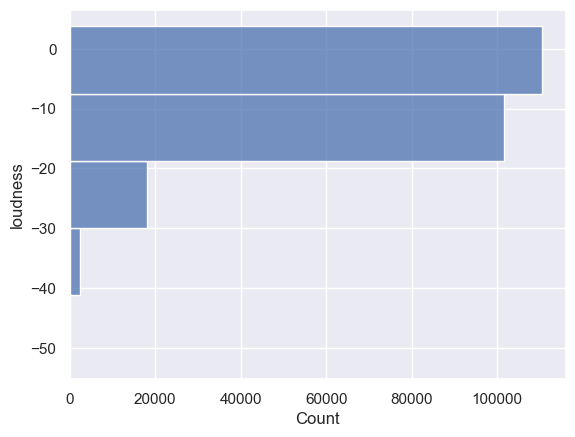

In [38]:
sns.set(style='darkgrid')
sns.histplot(data=df_spotify, y='loudness', bins=5, stat='count')

The next variable we analyzed is the loudnes, in this complete histogram we can see that the majority of the tracks are between +3 to -20 Db

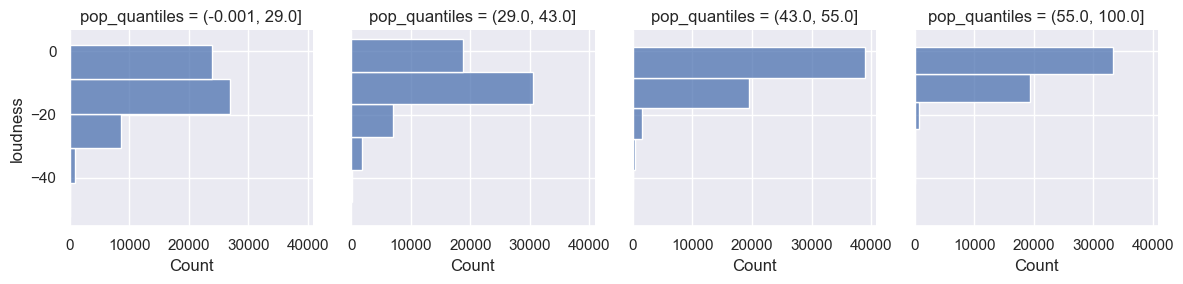

In [39]:
g = sns.FacetGrid(df_spotify, col='pop_quantiles')
g.map_dataframe(sns.histplot, y='loudness', bins=5)

The fourth plot is the valence histogram. In this one we can see that the majority of the content is between 0.2 and 0.6 in the middle of valence. Remember that valence is the positiviness of the music.

<AxesSubplot:xlabel='Count', ylabel='valence'>

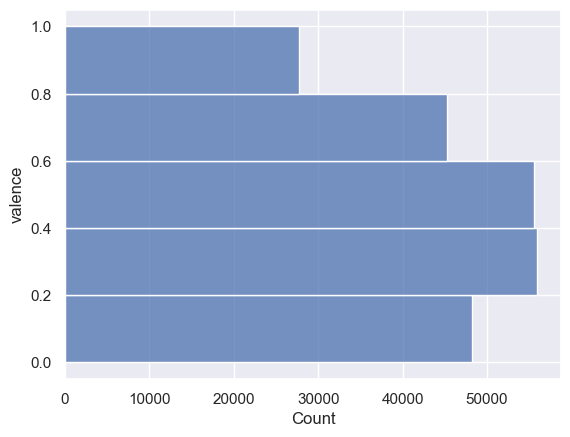

In [40]:
sns.set(style='darkgrid')
sns.histplot(data=df_spotify, y='valence', bins=5, stat='count')

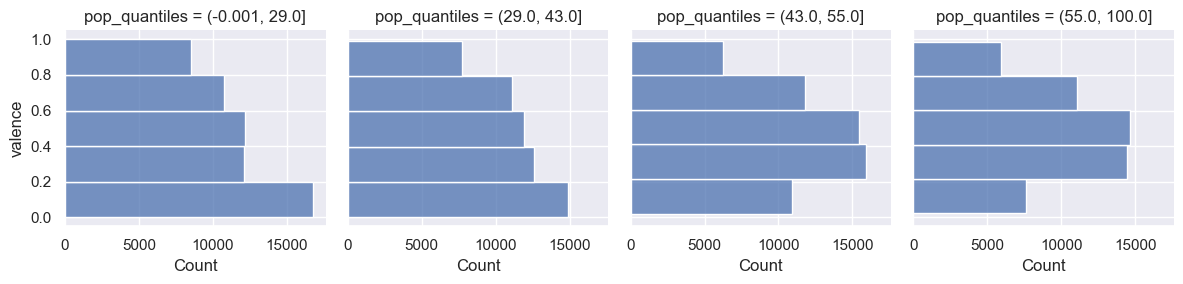

In [41]:
g = sns.FacetGrid(df_spotify, col='pop_quantiles')
g.map_dataframe(sns.histplot, y='valence', bins=5)

When analizing the quantiles, is important to mention that in the lower popularity bucket the valence is also the lower where the majority for the majority of the tracks and in the case of the highest popularity bucket the valance between .4 and .6 is where the majority of the tracks are located

The fifth plot is the danceability histogram

<AxesSubplot:xlabel='Count', ylabel='danceability'>

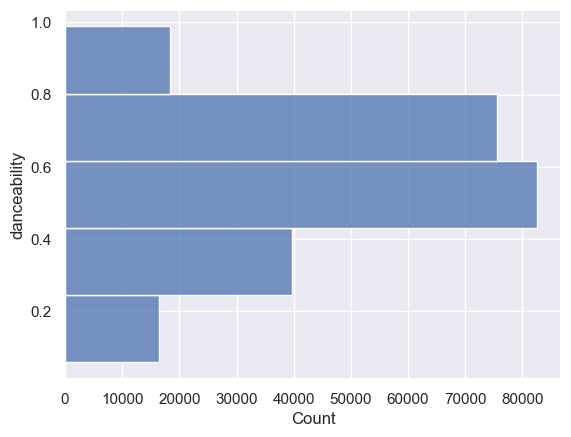

In [42]:
sns.set(style='darkgrid')
sns.histplot(data=df_spotify, y='danceability', bins=5, stat='count')

So, seems that in gneral the tracks in the data set has a danceability between .4 and .8 so suitable to dance. Now let's see if the popularity is related to it

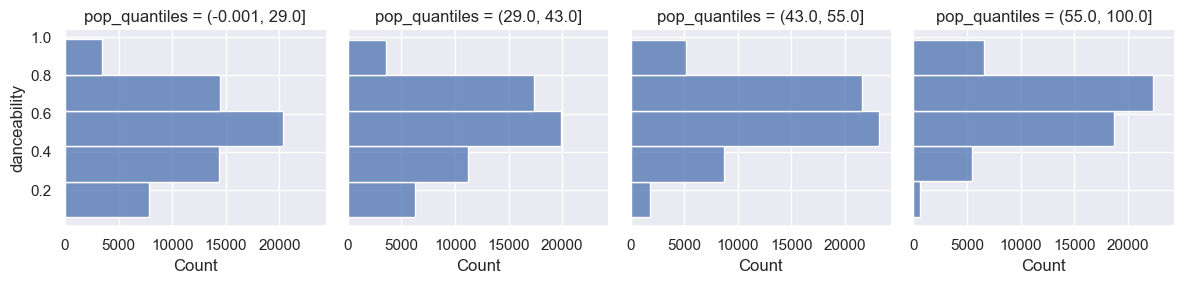

In [43]:
g = sns.FacetGrid(df_spotify, col='pop_quantiles')
g.map_dataframe(sns.histplot, y='danceability', bins=5)

Well, seems that the more popular tracks are likely danceable music.

In the following plot I want to visualize how the data is distributed related to the Time Signature (Beats per bar)

<AxesSubplot:xlabel='time_signature', ylabel='count'>

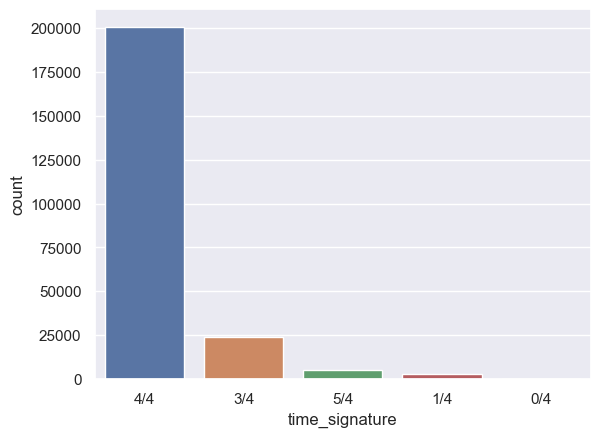

In [44]:
sns.countplot(data=df_spotify, x='time_signature')

<AxesSubplot:xlabel='mode', ylabel='count'>

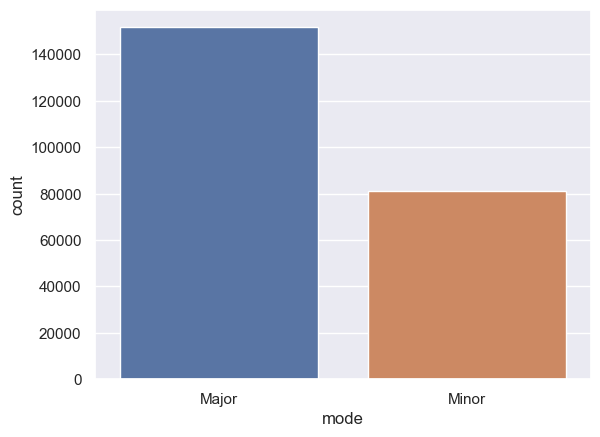

In [45]:
sns.countplot(data=df_spotify, x='mode')

Even when the previous analysis showed me that there are no outliners in the data I will plot the most important values to verify that there are no values outside the range of 0-1
- energy
- acousticness
- valence
- danceability

<AxesSubplot:xlabel='time_signature', ylabel='energy'>

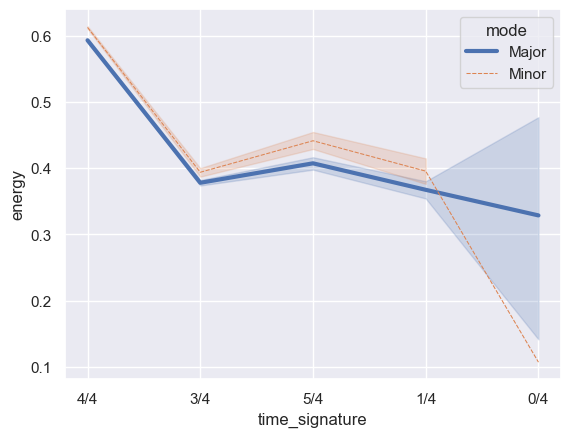

In [46]:
sns.lineplot(x="time_signature",y="energy", data=df_spotify, hue="mode", style="mode", size="mode")

<AxesSubplot:xlabel='time_signature', ylabel='loudness'>

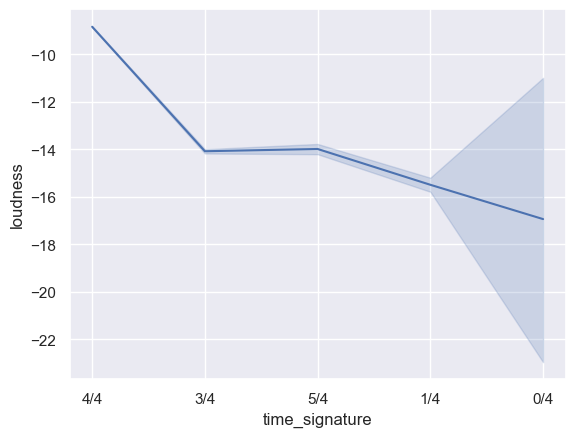

In [47]:
sns.lineplot(x="time_signature",y="loudness", data=df_spotify)

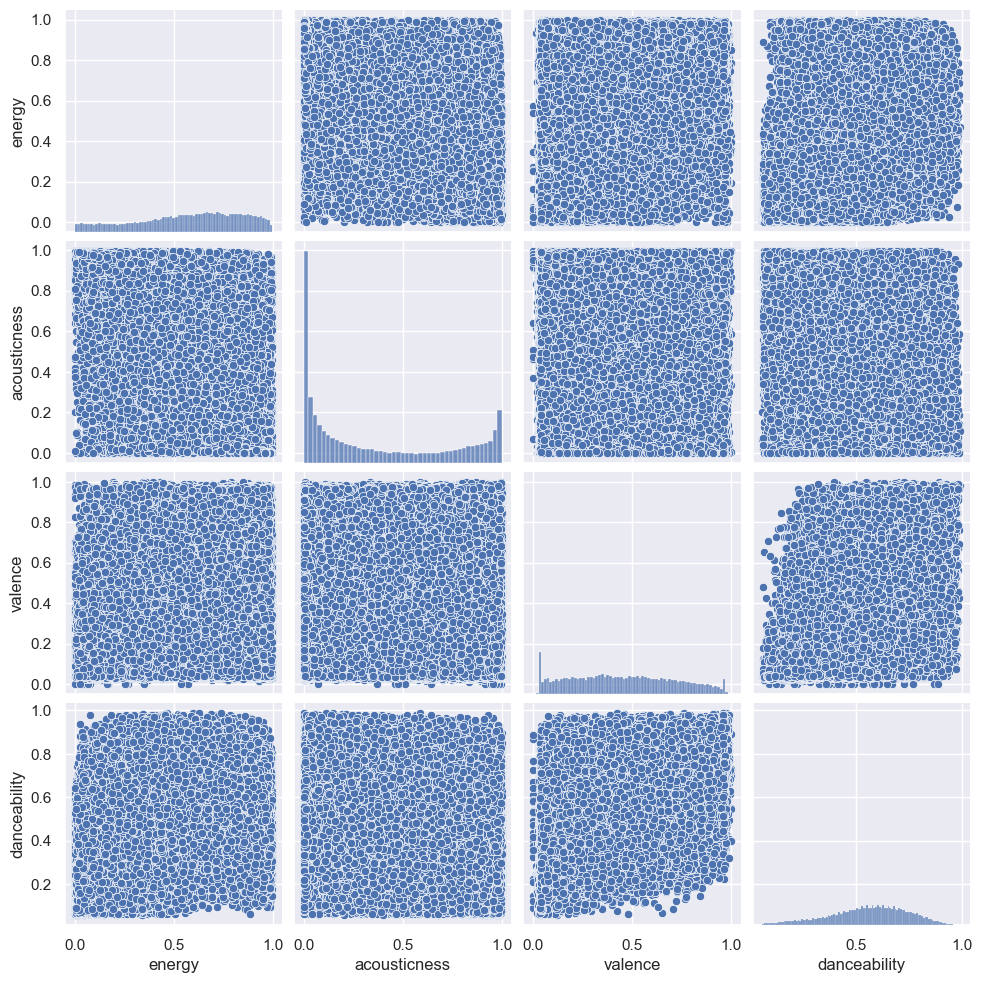

In [48]:

df_correlated = df_spotify[['energy','acousticness','valence','danceability']]
sns.pairplot(data=df_correlated)


As we can see in this correlation plot, is that because the high number of values is not easy to identify any trend or pattern on the data. But we can see the following
- Energy distribution is skewed to the right
- Acousticness is a curve, and there are some outliers on the left
- Valence and Danceability has a uniform distribution

Now, I want to visualize the distribution of the categorical variable "genre" for the energy

Energy = 1 means high energy

Energy = 0 means low energy

As we can see in the plot below, the top 5 genres winth respect of energy are
- Ska
- Anime
- Electronic
- Alternative
- Rock

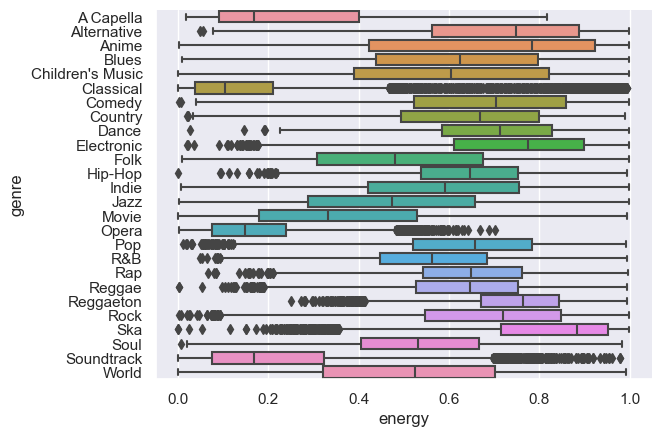

In [49]:
sns.set_style("darkgrid")
df_spotify.sort_values(by=["genre"], ascending=True, inplace=True)
ax = sns.boxplot(x="energy",y="genre", data=df_spotify)
sns.despine()

In this box plot we can see that the genre SKA is the one with highest energy followed by Anime and Electronic

We found a correlation related to energy - loudnes, so let's see how  is the loudness per genere

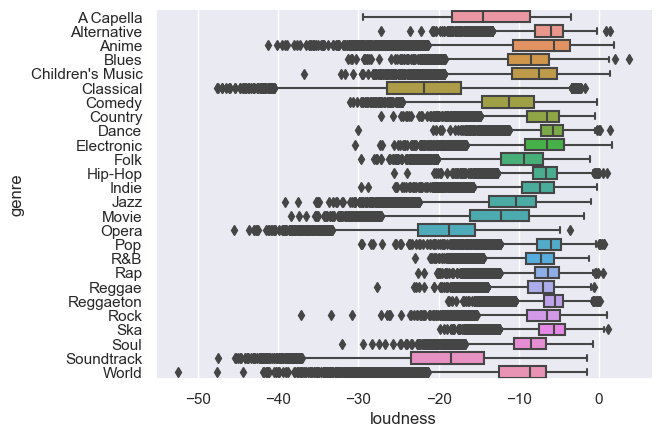

In [50]:
sns.set_style("darkgrid")
ax = sns.boxplot(x="loudness",y="genre", data=df_spotify)
sns.despine()

And what about popularity? How is popularity distributed?
Top five popular genres are
- Pop
- Dance
- Rock
- Rap
- Hip Hop

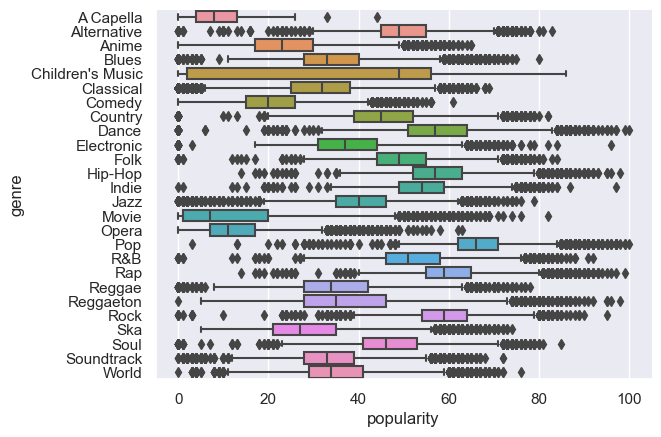

In [51]:
sns.set_style("darkgrid")
ax = sns.boxplot(x="popularity",y="genre", data=df_spotify)
sns.despine()

We are going to focus our analysis in the traks that are in the popularity levels >= 75 
* The highest popularity is 100

I will use only those variables where I found some correlation
* loudness - energy
* energy   - acousticness
* loudness - acousticness
* valence  - danceability


In [52]:
df_correlated = df_spotify[['energy','acousticness','valence','danceability', 'popularity', 'genre','mode', 'loudness']]
df_correlated = df_correlated.loc[df_correlated['popularity']>=75]
df_correlated.groupby("genre").apply(len).sort_values(ascending=False)
df_correlated.shape

(3593, 8)

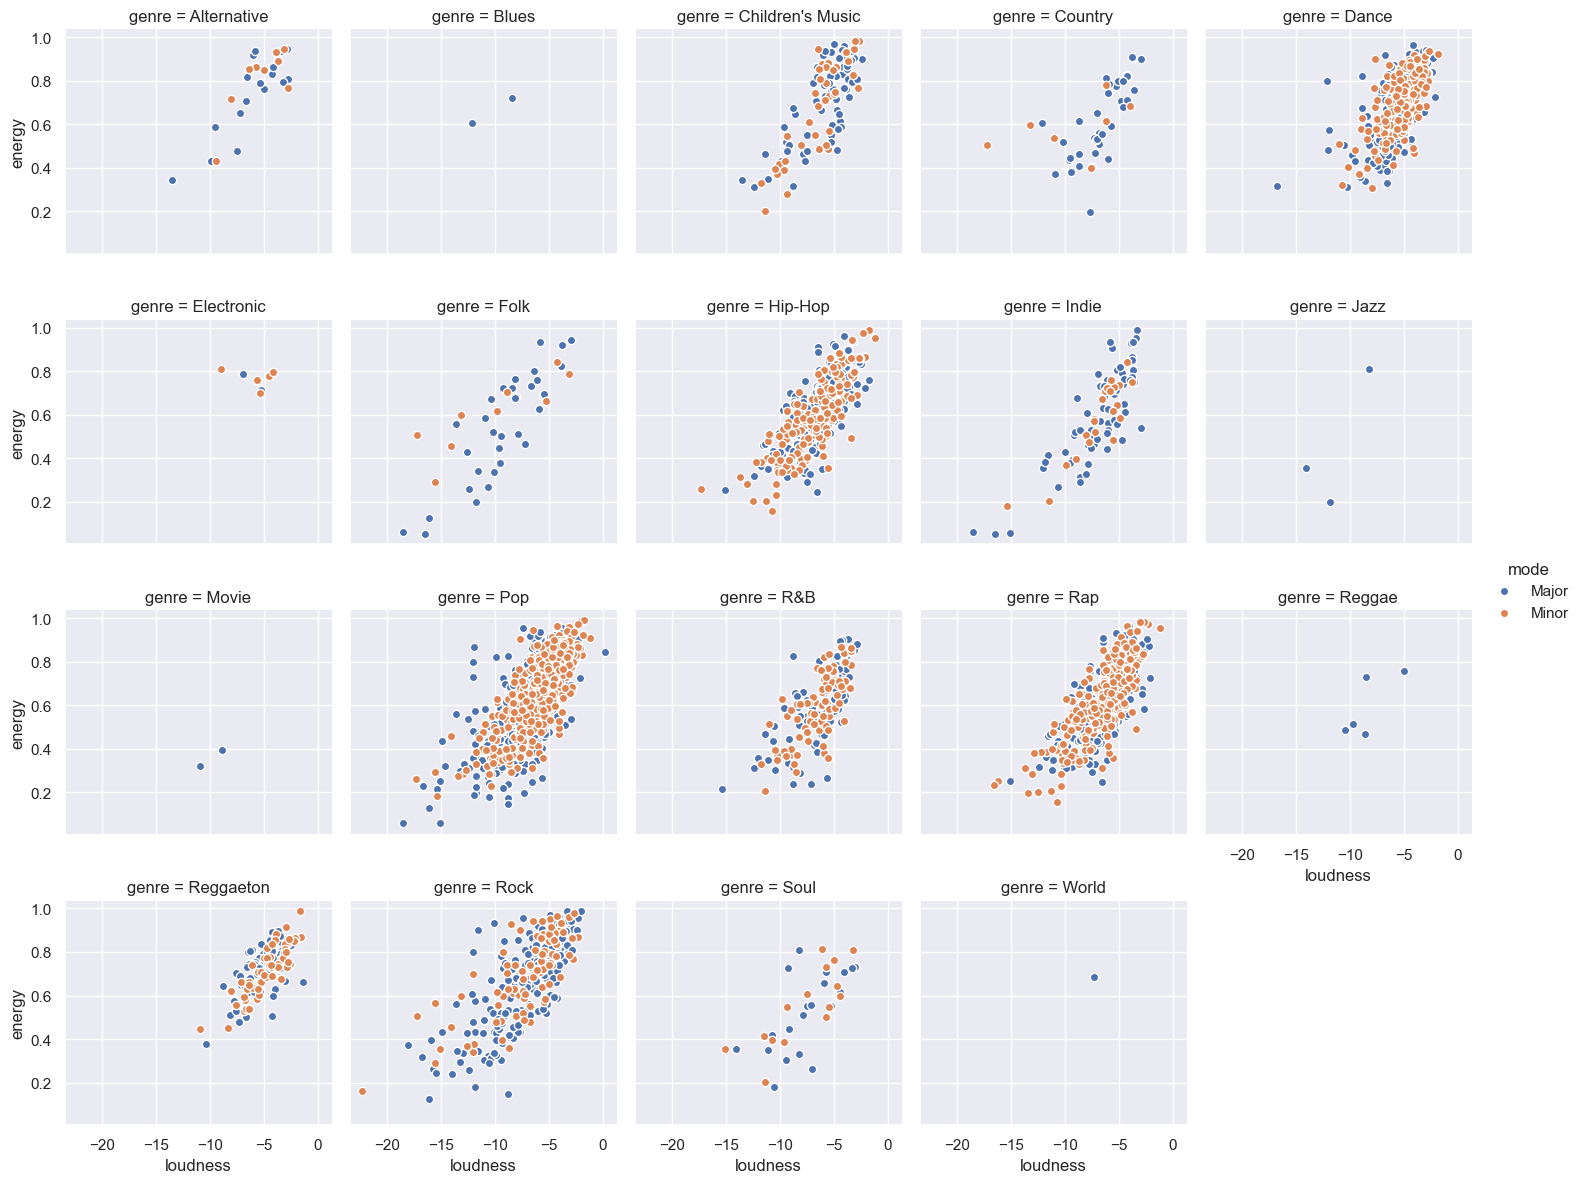

In [53]:
graph = sns.FacetGrid(df_correlated, col='genre',hue='mode', col_wrap=5)
graph.map(plt.scatter, 'loudness','energy', edgecolor='w').add_legend()
plt.show()

In these plots, we can see the positive correlation between energy and loudness in the different genres we used to plot.  

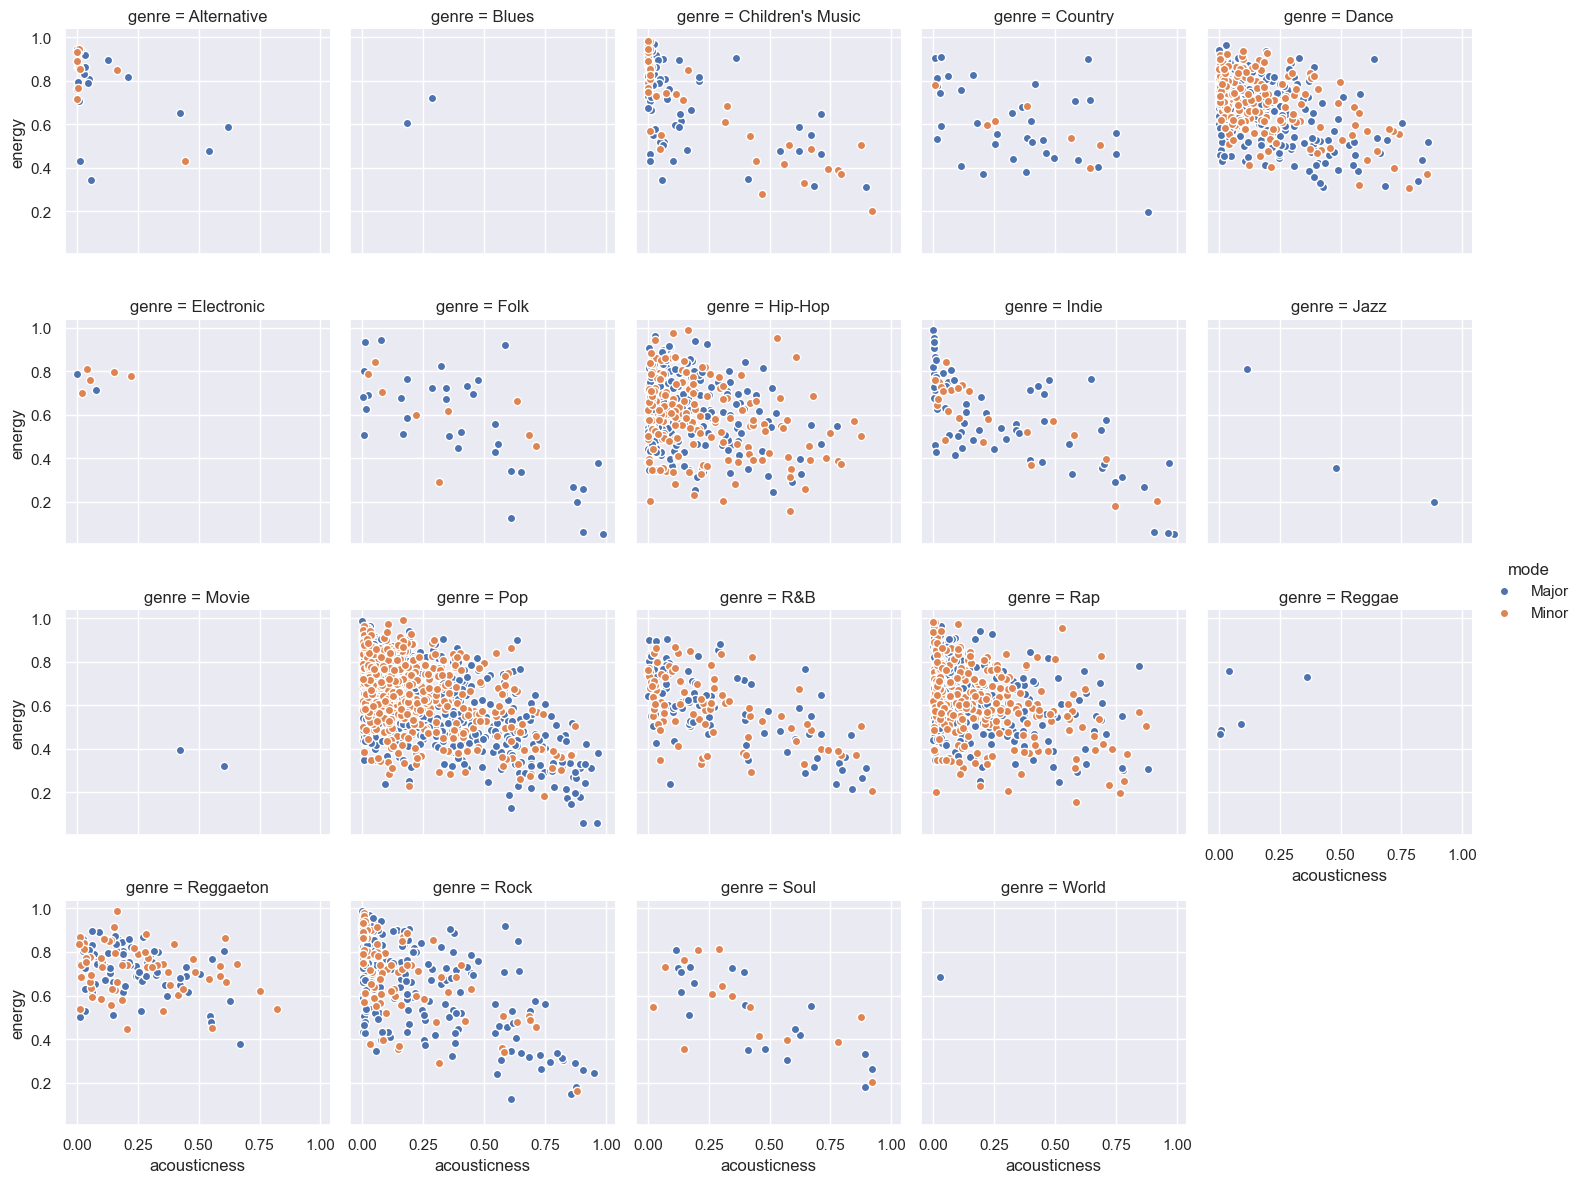

In [54]:
graph = sns.FacetGrid(df_correlated, col='genre',hue='mode',col_wrap=5)
graph.map(plt.scatter, 'acousticness','energy', edgecolor='w').add_legend()
plt.show()

In this second correlation plot, we can see how the energy is negative correlated with acousticness in the different genres. When we identify a correlation to thas a tendency to goes to the left is when we called a negative correlation, which is what we saw in the numerical table mentioned before

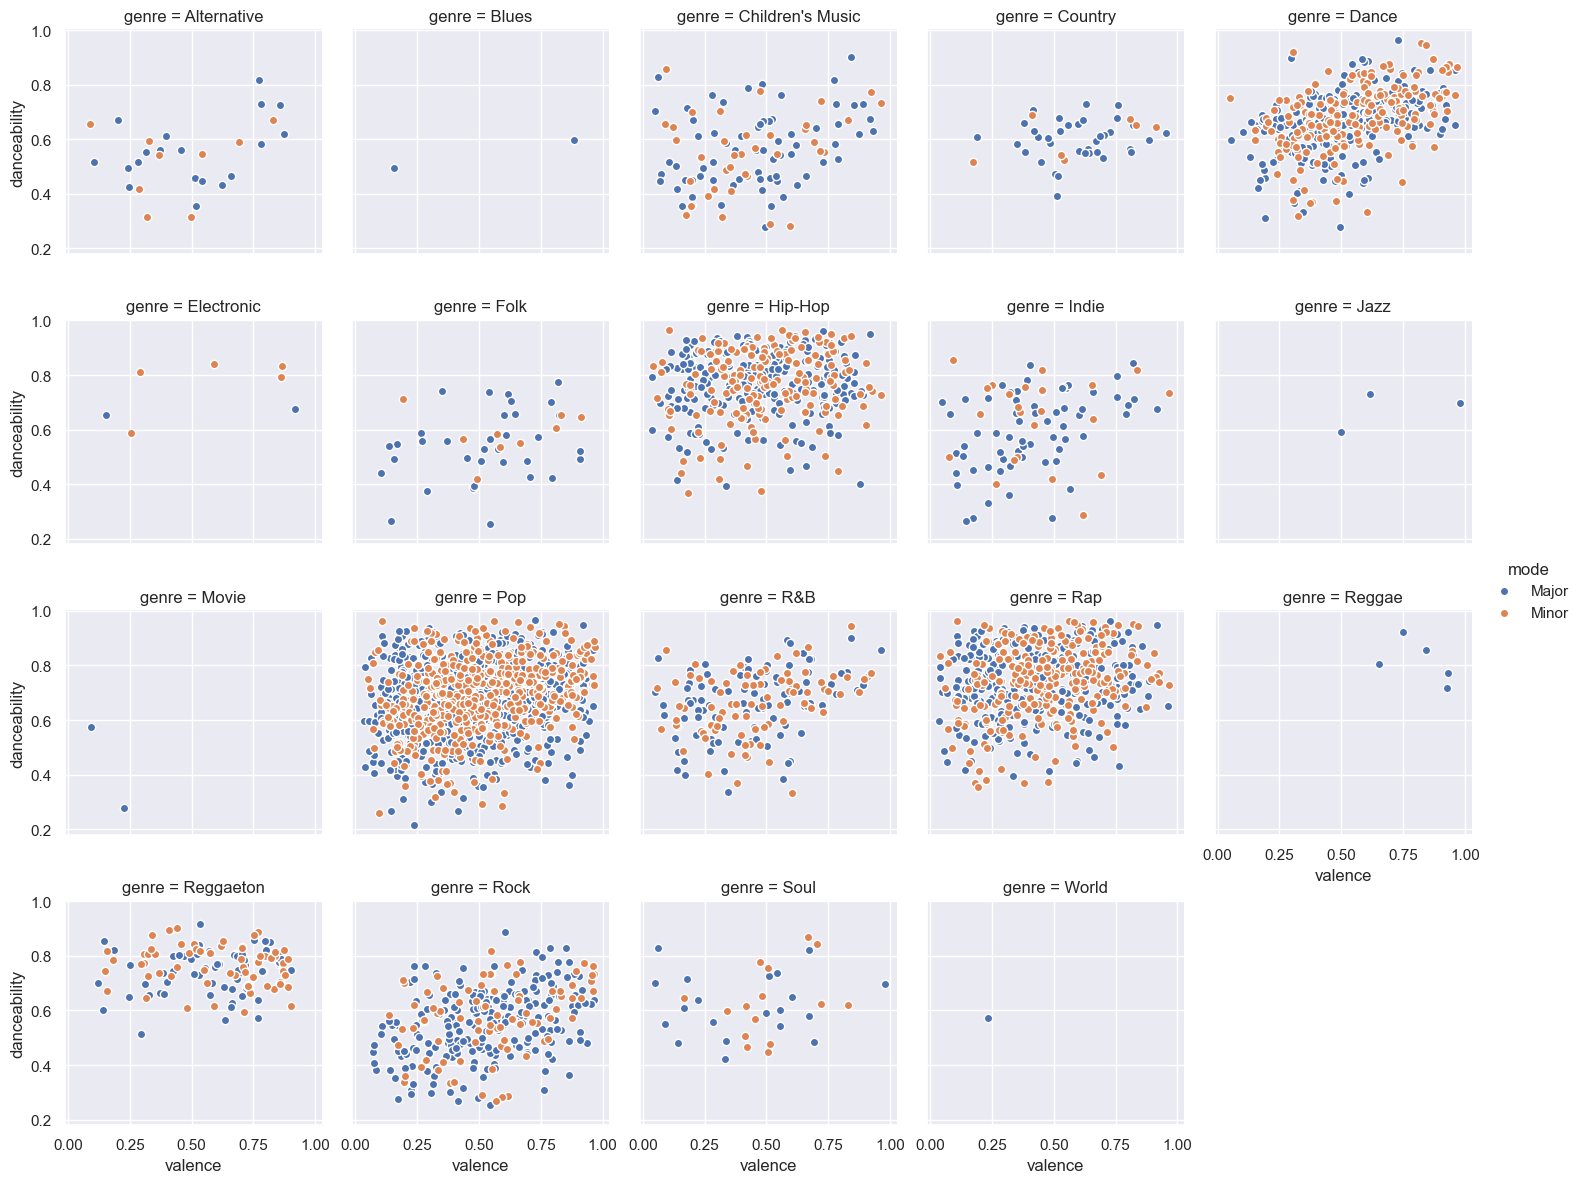

In [55]:
graph = sns.FacetGrid(df_correlated, col='genre',hue='mode',col_wrap=5)
graph.map(plt.scatter, 'valence','danceability', edgecolor='w').add_legend()
plt.show()

This final plot, we can see that a corration close to .4 is not very clear when plotting it, is not easy to identy a pattern but tends to go to the same direction the information somehow.


Well, at this point my opriginal theories are not TRUE, Popularity is not related to any variable, but genre seems to be involve with the different features of the music. So this bring me new questions
- Is it possible to identify values that affect the popularity?
- These variables that we identified that are correlated can help to define a "recipe" to create music that will be ranked with high popularity?
- Can we predict the popularity defining some of the features/characteristics that the music needs to have?


We will validate these questions while working in the Tableau Dashboard.


# References

Since I am not an expert in music, I did a research about some music characteristics to understand more about them, here some general references I used during that research

The kaggle project 
https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

Artist popularity definition
https://community.spotify.com/t5/Content-Questions/Artist-popularity/td-p/4415259

Definition of Time Signature (Music)
https://www.skoove.com/blog/time-signatures-explained/

Definition of Key
https://en.wikipedia.org/wiki/Pitch_class

